<a href="https://colab.research.google.com/github/anipriyo/Qiskit-Quantum-Implementations/blob/main/Shor's_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit_aer

In [65]:
import math
from fractions import Fraction
from math import gcd, pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from random import randint

In [66]:
def c_amodN(a, N, num_qubits):
    """
    Controlled multiplication by a mod N.
    Args:
        a: Integer coprime with N.
        N: The number to factorize.
        num_qubits: Number of qubits for the target register.
    Returns:
        **QuantumCircuit implementing the controlled-U gate.**
    """
    if gcd(a, N) != 1:
        raise ValueError(f"'a' ({a}) and 'N' ({N}) must be coprime.")

    U = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        U.x(i)  # Example modular operation (custom logic for larger N needed)

    U = U.to_gate()
    U.name = f"{a} mod {N}"
    c_U = U.control()  # Controlled version of U

    # Create a full QuantumCircuit for the controlled operation
    c_U_circuit = QuantumCircuit(num_qubits + 1)
    c_U_circuit.append(c_U, range(num_qubits + 1))
    return c_U_circuit

**Visual Representation of Phase estimation Circuit**

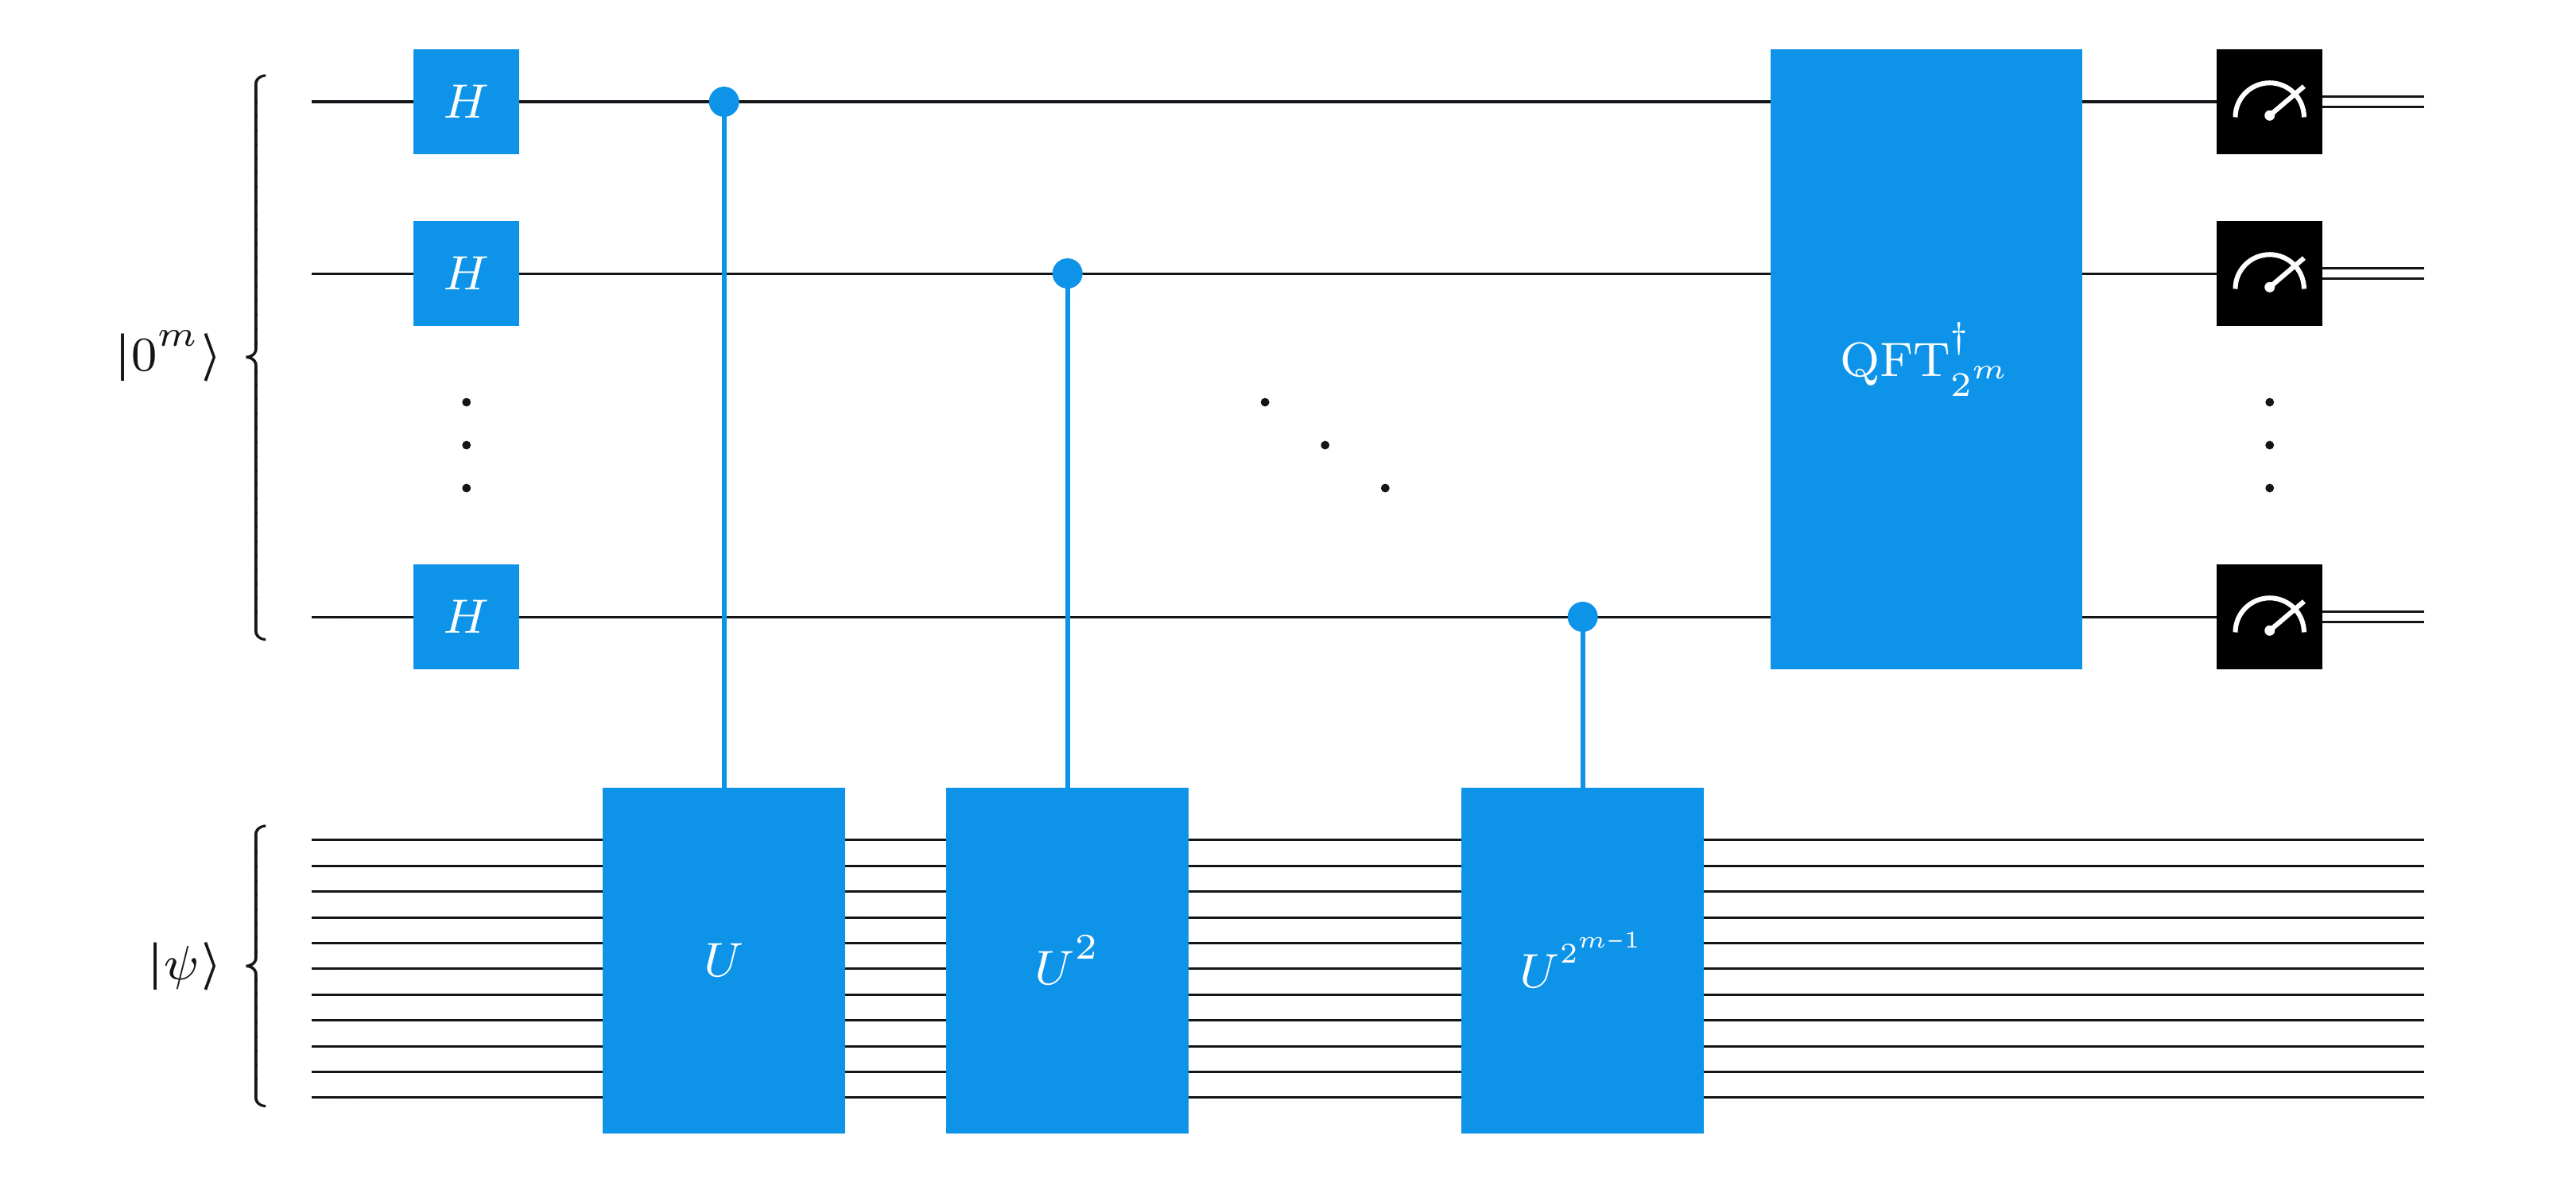

In [67]:
def phase_estimation(controlled_circuit, psi_prep, precision):
    """
    Phase estimation algorithm.
    """
    control_register = QuantumRegister(precision, "control")
    target_register = QuantumRegister(psi_prep.num_qubits, "target")
    output_register = ClassicalRegister(precision, "output")

    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep, qubits=target_register, inplace=True)

    # Apply Hadamard gates
    qc.h(control_register)

    # Apply controlled unitary operations
    for index, qubit in enumerate(control_register):
        for _ in range(2 ** index):
            qc.compose(controlled_circuit, qubits=[qubit] + list(target_register), inplace=True)

    # Apply inverse QFT
    qc.compose(QFT(precision, inverse=True), qubits=control_register, inplace=True)

    # Measure
    qc.measure(control_register, output_register)

    # Simulate
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    # Decode the most likely phase
    measured_phase = max(counts, key=counts.get)
    decimal_phase = int(measured_phase, 2) / (2 ** precision)
    return decimal_phase

In [68]:
def find_coprime(N):
    """
    Finds a random integer 'a' that is coprime with N.
    """
    while True:
        a = randint(2, N - 1)
        if gcd(a, N) == 1:
            return a

In [71]:
N = int(input("Enter upto 8 digit number"))
# a = 7     # Random integer coprime with N
num_target_qubits = math.ceil(math.log2(N))  # Number of qubits for the target register

psi_prep = QuantumCircuit(num_target_qubits)
psi_prep.x(0)  # Prepare |1> state

FACTOR_FOUND = False
ATTEMPT = 0

Enter upto 8 digit number161


In [72]:
i=0
while not FACTOR_FOUND and (i in range (0,50)):
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    try:
        a = find_coprime(N)
        print(f"Random coprime 'a' chosen: {a}")
        # Perform phase estimation
        controlled_circuit = c_amodN(a, N, num_target_qubits)
        phase = phase_estimation(controlled_circuit, psi_prep, precision=8)
        frac = Fraction(phase).limit_denominator(N)
        r = frac.denominator

        print(f"Phase: {phase}, Fraction: {frac}, r: {r}")

        if r % 2 == 0 and phase != 0:
            guess = gcd(a ** (r // 2) - 1, N)
            if guess not in [1, N] and (N % guess) == 0:
                print(f"Non-trivial factor found: {guess}")
                FACTOR_FOUND = True
            else:
                print("Failed to find a non-trivial factor.")
    except ValueError as e:
        print(f"Error during attempt: {e}")
    i=i+1


Attempt 1
Random coprime 'a' chosen: 82
Phase: 0.5, Fraction: 1/2, r: 2
Failed to find a non-trivial factor.

Attempt 2
Random coprime 'a' chosen: 108
Phase: 0.0, Fraction: 0, r: 1

Attempt 3
Random coprime 'a' chosen: 99
Phase: 0.0, Fraction: 0, r: 1

Attempt 4
Random coprime 'a' chosen: 79
Phase: 0.5, Fraction: 1/2, r: 2
Failed to find a non-trivial factor.

Attempt 5
Random coprime 'a' chosen: 118
Phase: 0.0, Fraction: 0, r: 1

Attempt 6
Random coprime 'a' chosen: 55
Phase: 0.5, Fraction: 1/2, r: 2
Failed to find a non-trivial factor.

Attempt 7
Random coprime 'a' chosen: 75
Phase: 0.5, Fraction: 1/2, r: 2
Failed to find a non-trivial factor.

Attempt 8
Random coprime 'a' chosen: 146
Phase: 0.5, Fraction: 1/2, r: 2
Failed to find a non-trivial factor.

Attempt 9
Random coprime 'a' chosen: 127
Phase: 0.0, Fraction: 0, r: 1

Attempt 10
Random coprime 'a' chosen: 76
Phase: 0.5, Fraction: 1/2, r: 2
Failed to find a non-trivial factor.

Attempt 11
Random coprime 'a' chosen: 62
Phase: 0.